# About the dataset
<b>The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.</b>

Link to where I found the data:

https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

<b>Additional informations:</b>

- <b>Sleep duration</b> refers to the amount of time a person spend sleeping, essentially the number of hours of sleep he gets. 
- <b>Sleep quality</b> relates to how effectively a person sleep during that time. It considers factors like whether his sleep is deep, if he experiences frequent interruptions, or if he suffers from insomnia. Somebody could get 8 hours of sleep, but if the quality is poor, he might still wake up feeling tired.
- <b>Insomnia</b> is a sleep disorder characterized by difficulties in falling asleep, staying asleep, or waking up too early in the morning. Insomnia can be caused by various factors, including stress, unhealthy lifestyle, health issues, or certain medications. Individuals with insomnia often experience fatigue, irritability, difficulty concentrating, and other problems associated with poor sleep.
- <b>Sleep apnea</b> is a potentially serious sleep disorder in which breathing repeatedly stops and starts.  It occurs when throat muscles reduce space for air to pass through (obstructive) or issues with the brain signals that control breathing (central). Symptoms include loud snoring, abrupt awakenings with a choking sound, excessive daytime sleepiness and headaches. It's a serious condition that requires medical attention.

source: www.sleepfoundation.org

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import plotly.express as px

In [2]:
# Fixings warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Loading the data

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') 
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Cleaning / Wrangling Data

In [4]:
# Checking NaN Values

df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
# Checking duplicates

duplicates = df.duplicated()

duplicates_df = df[duplicates]
print(duplicates_df)

Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []


<b>There are no duplicates.</b>

In [6]:
# Converting column names to snake_case format

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
# Checking count of unique values

df.nunique()

person_id                  374
gender                       2
age                         31
occupation                  11
sleep_duration              27
quality_of_sleep             6
physical_activity_level     16
stress_level                 6
bmi_category                 4
blood_pressure              25
heart_rate                  19
daily_steps                 20
sleep_disorder               2
dtype: int64

In [8]:
# Dropping person_id column

df.drop('person_id', axis=1, inplace=True)

In [9]:
# Checking unique values in each column

for col in df.columns:
    vals = df[col].unique()
    print(f"Unique values in '{col}':\n{vals}\n")

Unique values in 'gender':
['Male' 'Female']

Unique values in 'age':
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]

Unique values in 'occupation':
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique values in 'sleep_duration':
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]

Unique values in 'quality_of_sleep':
[6 4 7 5 8 9]

Unique values in 'physical_activity_level':
[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]

Unique values in 'stress_level':
[6 8 7 4 3 5]

Unique values in 'bmi_category':
['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique values in 'blood_pressure':
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92'

In [10]:
# NaN values in sleep_disorder column may mean no disorder or no information about disorder, 
# that's why I'm changing NaN values to 'None'

df['sleep_disorder'].fillna('None', inplace=True)
df["sleep_disorder"].value_counts()

sleep_disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [11]:
# Replacing 'Normal Weight' with 'Normal' in the 'bmi_category' column

df['bmi_category'].replace({'Normal Weight': 'Normal'}, inplace=True)
df['bmi_category'].value_counts()

bmi_category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [12]:
# Splitting 'blood_pressure' column to 'systolic_bp' and 'diastolic_bp'
# Adding 'blood_pressure_category' column 

df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)

df['blood_pressure_category'] = 'Normal'
df.loc[(df['systolic_bp'] >= 140) | (df['diastolic_bp'] >= 90), 'blood_pressure_category'] = 'High'
df.loc[(df['systolic_bp'] < 90) | (df['diastolic_bp'] < 60), 'blood_pressure_category'] = 'Low'
df.loc[(df['systolic_bp'] >= 180) | (df['diastolic_bp'] >= 120), 'blood_pressure_category'] = 'Very High'

df.drop(['blood_pressure'], axis=1, inplace=True)
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp,blood_pressure_category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,High
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,High


# EDA

In [13]:
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp,blood_pressure_category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,High
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,High


In [14]:
df.shape

(374, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   374 non-null    object 
 1   age                      374 non-null    int64  
 2   occupation               374 non-null    object 
 3   sleep_duration           374 non-null    float64
 4   quality_of_sleep         374 non-null    int64  
 5   physical_activity_level  374 non-null    int64  
 6   stress_level             374 non-null    int64  
 7   bmi_category             374 non-null    object 
 8   heart_rate               374 non-null    int64  
 9   daily_steps              374 non-null    int64  
 10  sleep_disorder           374 non-null    object 
 11  systolic_bp              374 non-null    int32  
 12  diastolic_bp             374 non-null    int32  
 13  blood_pressure_category  374 non-null    object 
dtypes: float64(1), int32(2), i

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
sleep_duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
quality_of_sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
physical_activity_level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
stress_level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
heart_rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
daily_steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
systolic_bp,374.0,128.553476,7.748118,115.0,125.00,130.0,135.0,142.0
diastolic_bp,374.0,84.649733,6.161611,75.0,80.00,85.0,90.0,95.0


In [17]:
# Splitting into Categorical and Numerical

categorical = df.select_dtypes(include=object)
numerical = df.select_dtypes(include=np.number)

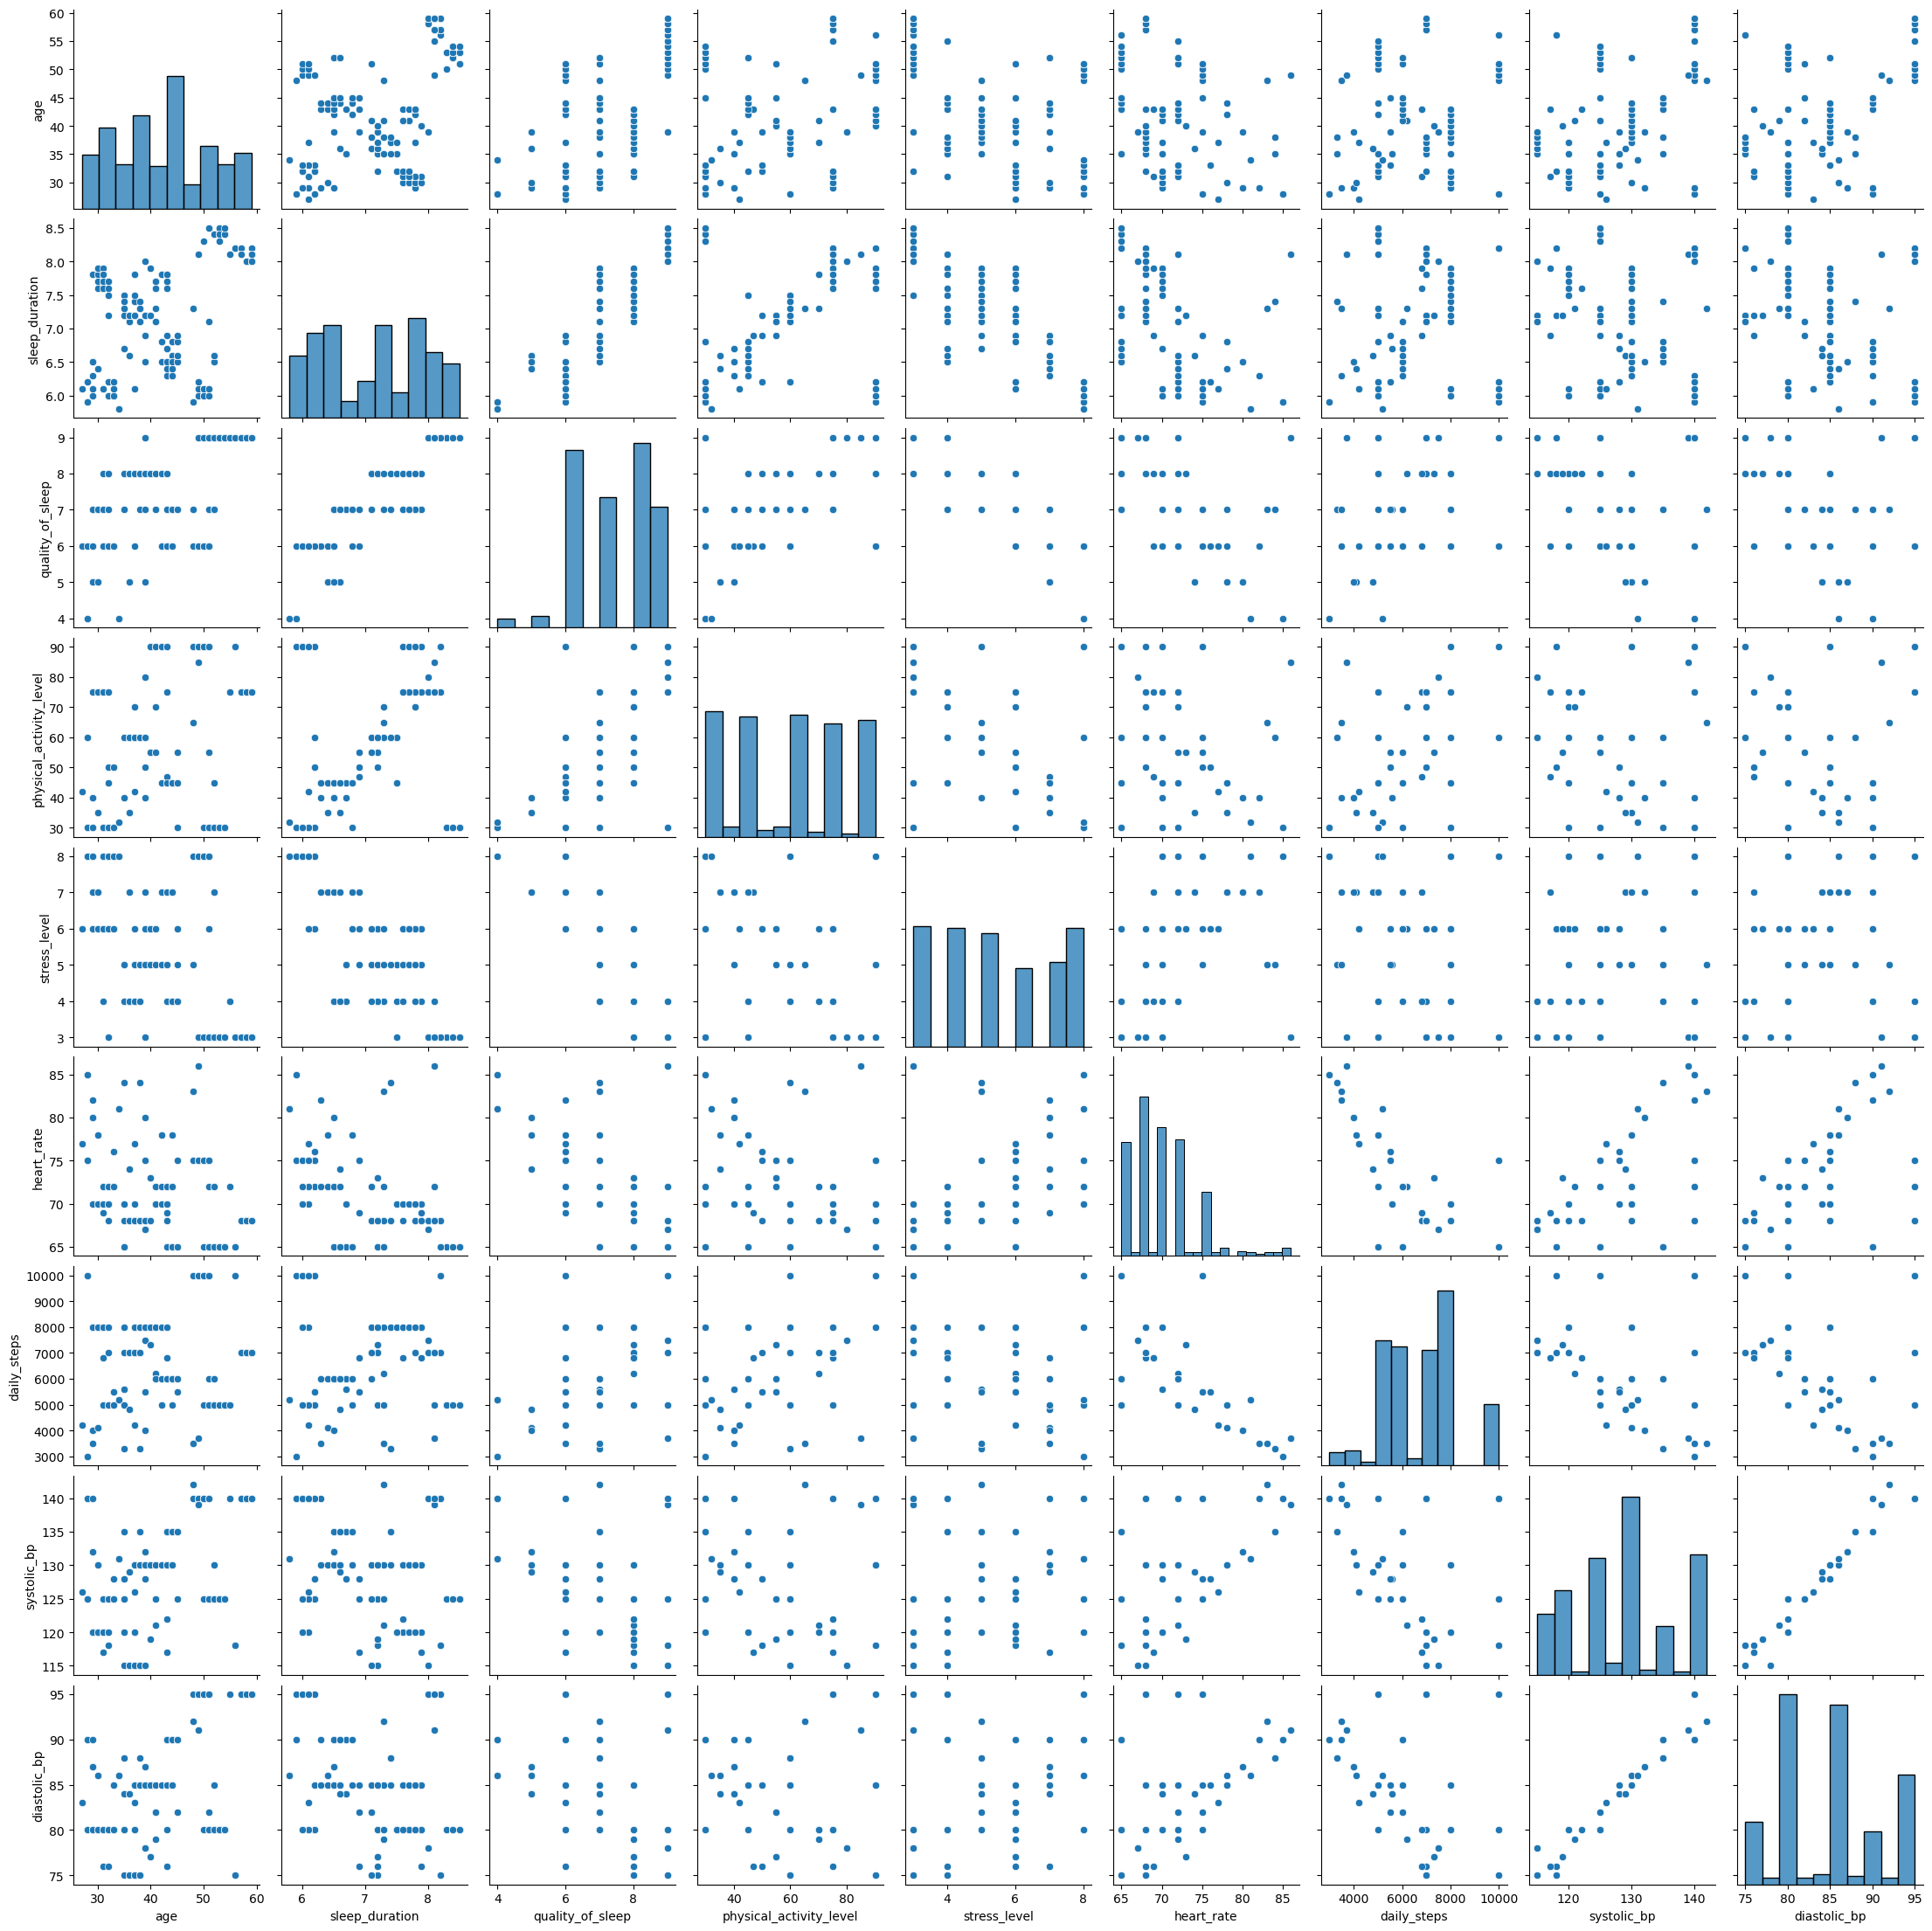

In [18]:
# Plotting all columns

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    sns.pairplot(df, size=2.5)
    plt.show()

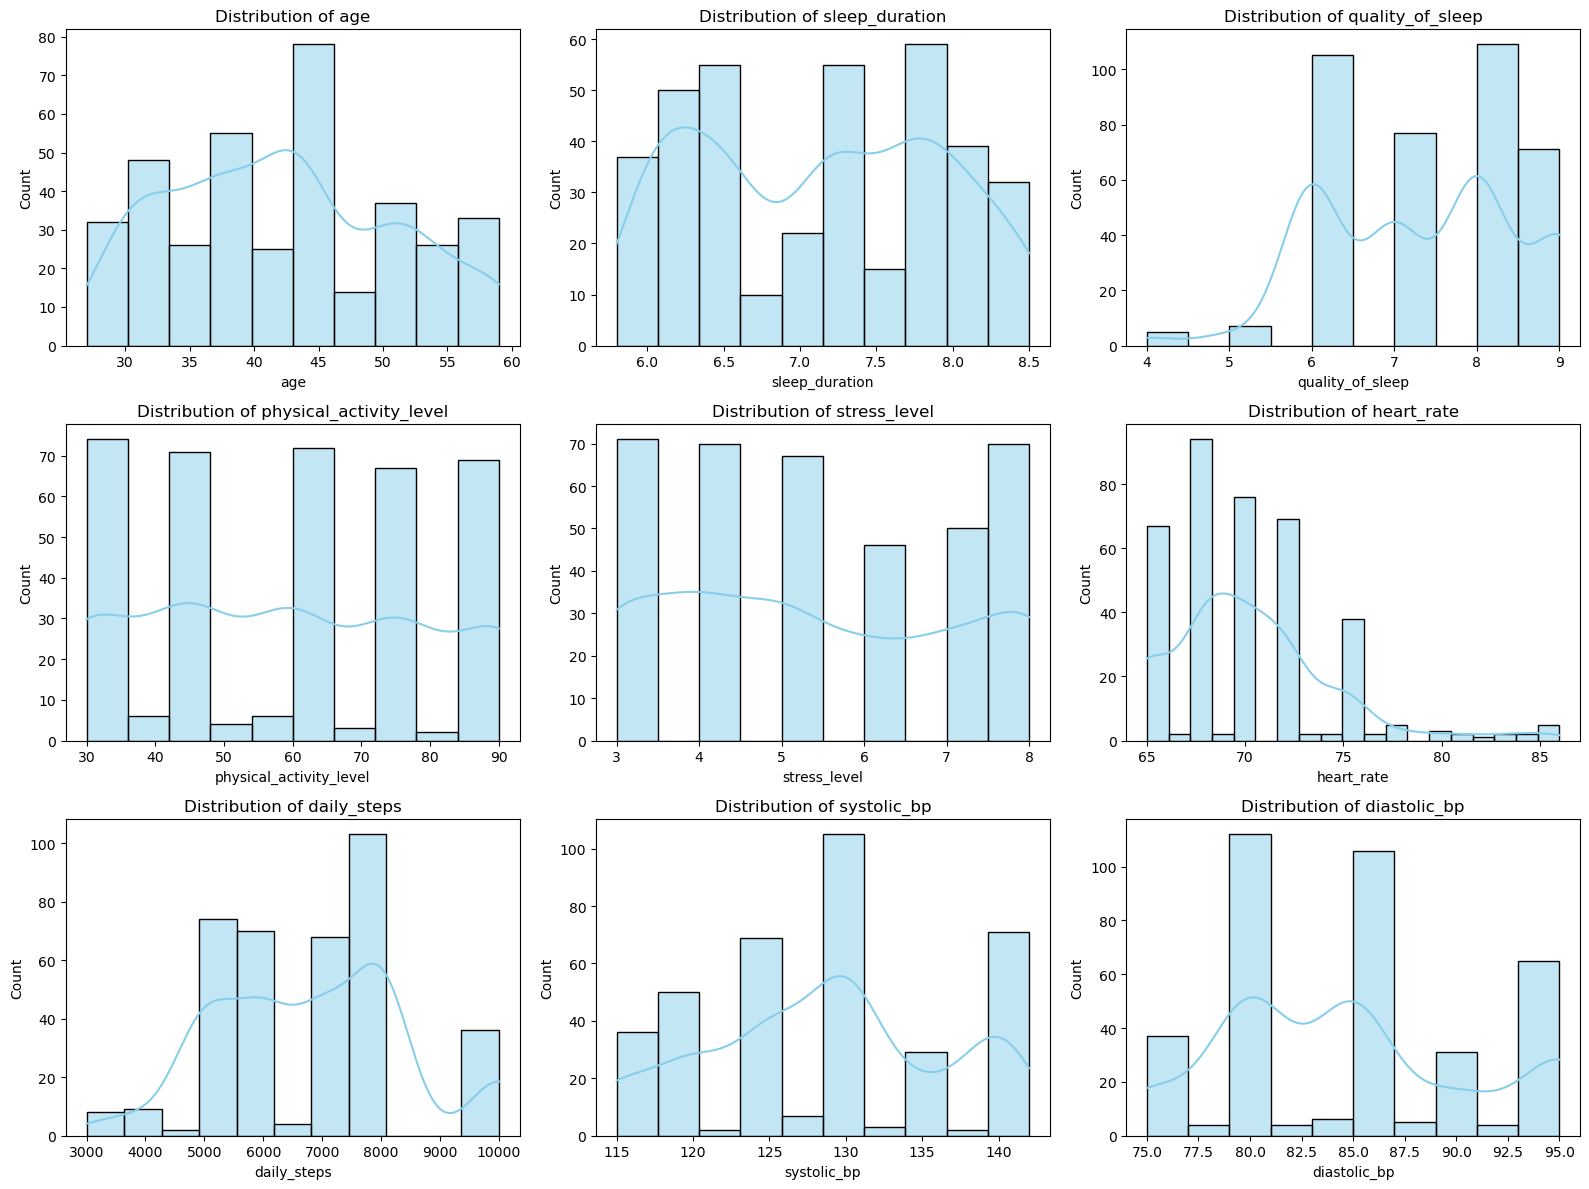

In [19]:
# Checking distributions of numerical columns 

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

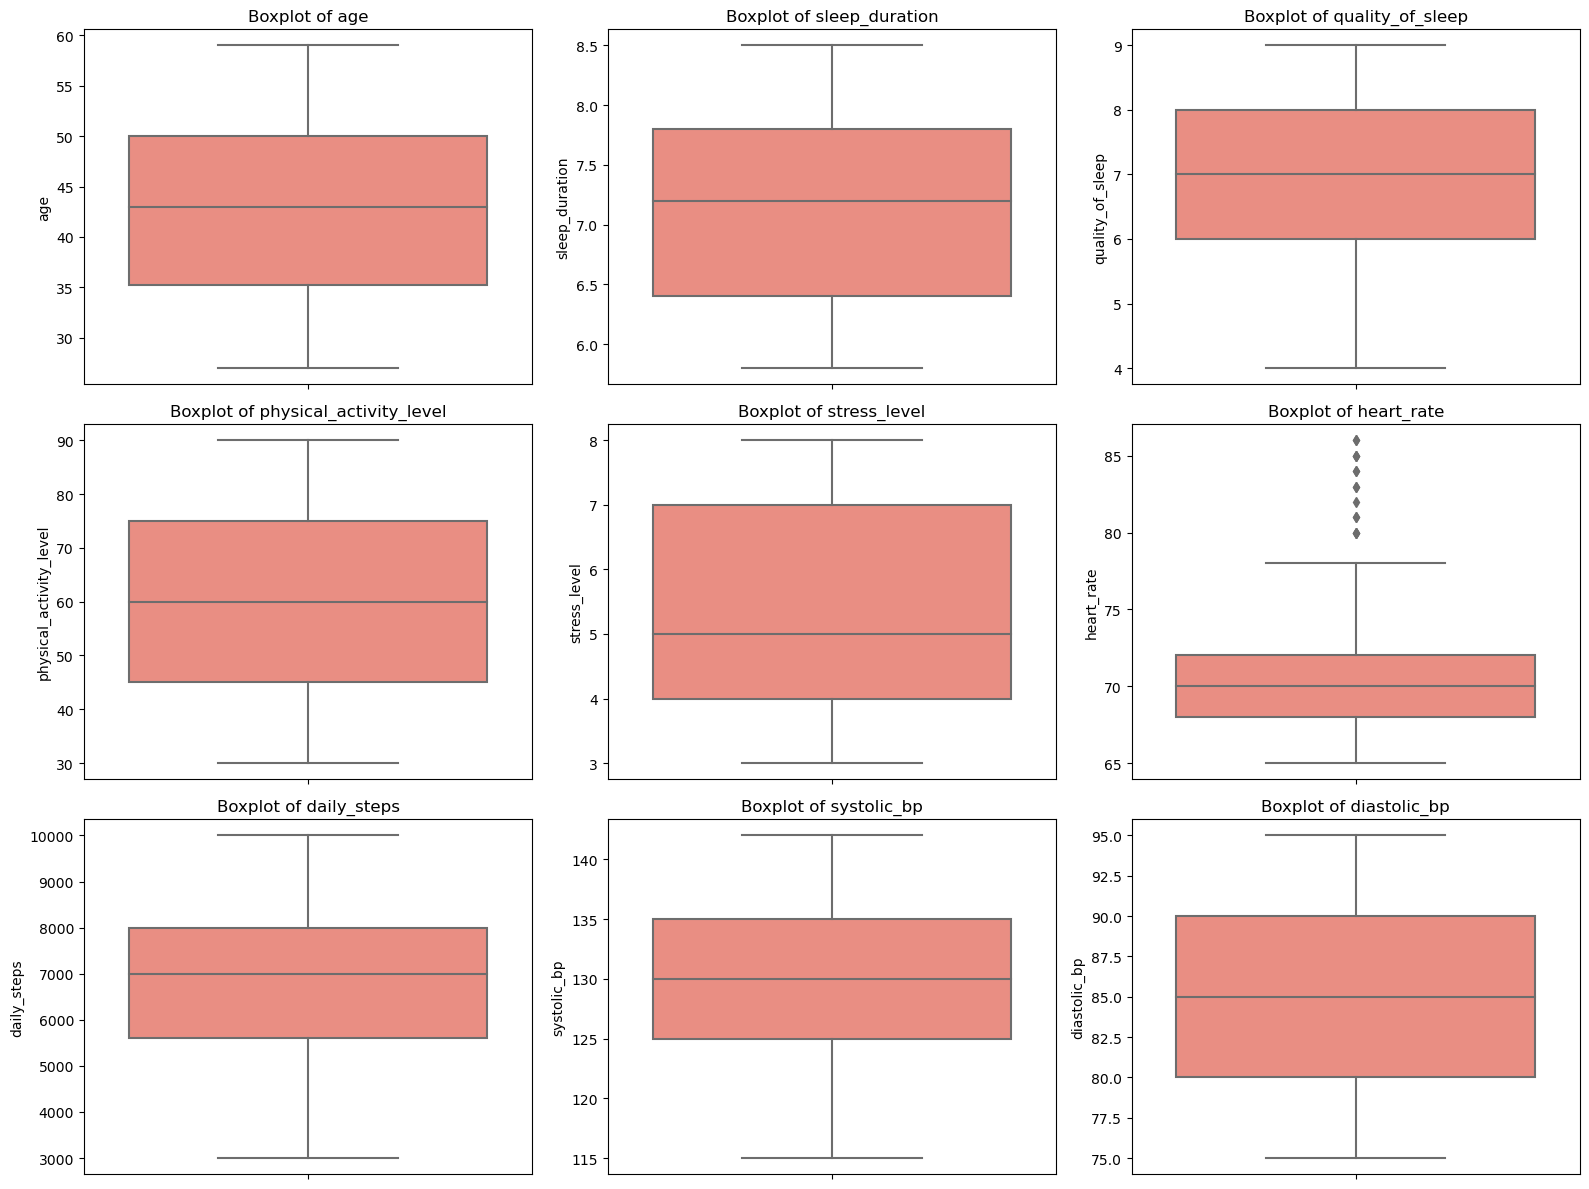

In [20]:
# Checking for outliers

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<b>There are few outliers in heart_rate column.</b>

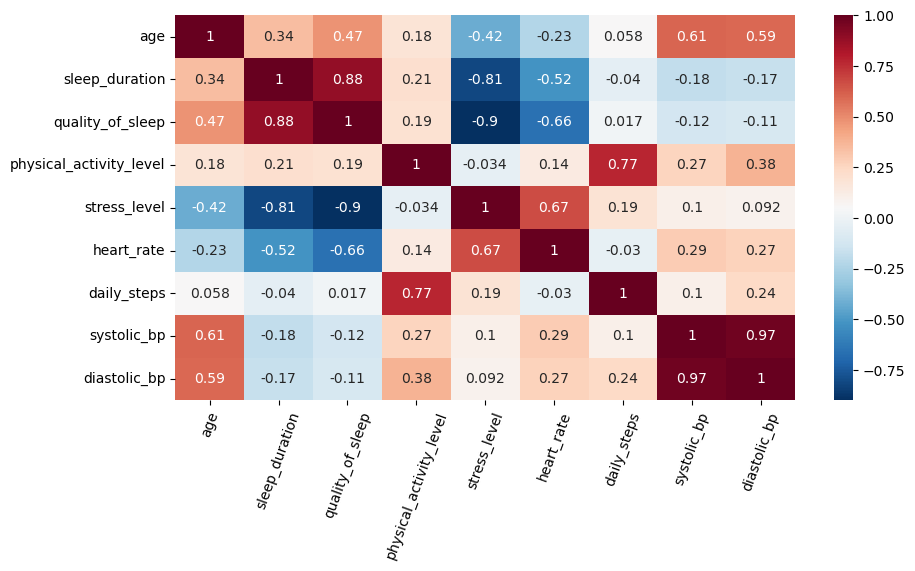

In [21]:
# Checking correlations using heatmap

fig, ax = plt.subplots(figsize=(10, 5))
heatmap = sns.heatmap(numerical.corr(), annot=True, cmap='RdBu_r')
for item in heatmap.get_xticklabels():
    item.set_rotation(70)
plt.show()

<b>Interpretation:</b>

- <b>Sleep Duration and Quality of Sleep (0.88):</b> very strong positive correlation. This indicates that individuals who sleep longer tend to report higher sleep quality.

- <b>Stress Level and Sleep Duration (-0.81):</b> very strong negative correlation. Higher stress levels are associated with shorter sleep durations.

- <b>Stress Level and Quality of Sleep (-0.90):</b> very strong negative correlation. Higher stress levels are strongly associated with lower sleep quality.

- <b>Heart Rate and Stress Level (0.67):</b> strong positive correlation. Higher stress levels are associated with higher heart rates.

- <b>Quality of Sleep and Heart Rate (-0.66):</b> strong negative correlation. This implies that individuals with higher heart rates may experience lower sleep quality.	

- <b>Physical Activity Level and Sleep Duration (0.21):</b> weak positive correlation. This suggests that more physically active individuals may have slightly longer sleep durations.

- <b>Age and Sleep Duration (0.34):</b> moderate positive correlation. On average, older individuals in this dataset tend to have slightly longer sleep durations.

- <b>Age and Quality of Sleep (0.47):</b> moderate positive correlation. It seems that, on average, older individuals report slightly better sleep quality.

- <b>Physical Activity Level and Daily Steps (0.77):</b> strong positive correlation between physical activity level and daily steps. This is expected, as more physically active individuals are likely to take more steps.

- <b>Age and Heart Rate (-0.23):</b> weak negative correlation. On average, older individuals tend to have slightly lower heart rates.

- <b>Blood Pressure and Stress Level (Systolic: 0.1, Diastolic: 0.09):</b> weak positive correlation between stress level and systolic and diastolic blood pressure. This suggests that a higher stress level is slightly associated with higher systolic and diastolic blood pressure.


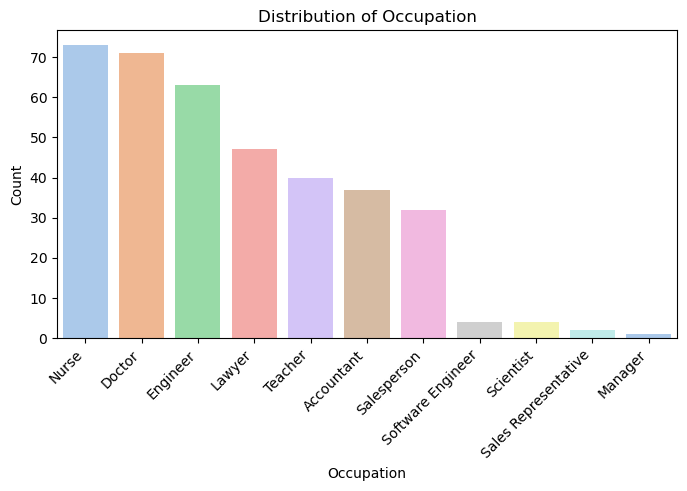

In [22]:
occupation_data = df['occupation']
plt.figure(figsize=(8, 4))
sns.countplot(x='occupation', data=df, order=df['occupation'].value_counts().index, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [23]:
df['occupation'].value_counts()

occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

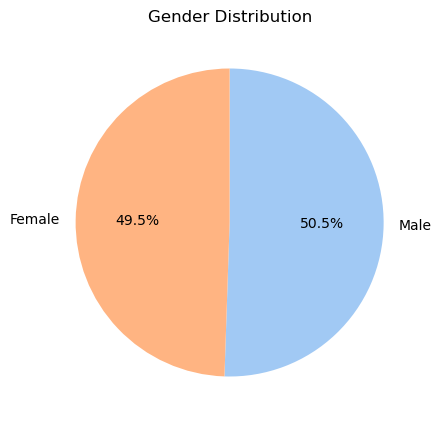

In [24]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.show()

In [25]:
df['gender'].value_counts()

gender
Male      189
Female    185
Name: count, dtype: int64

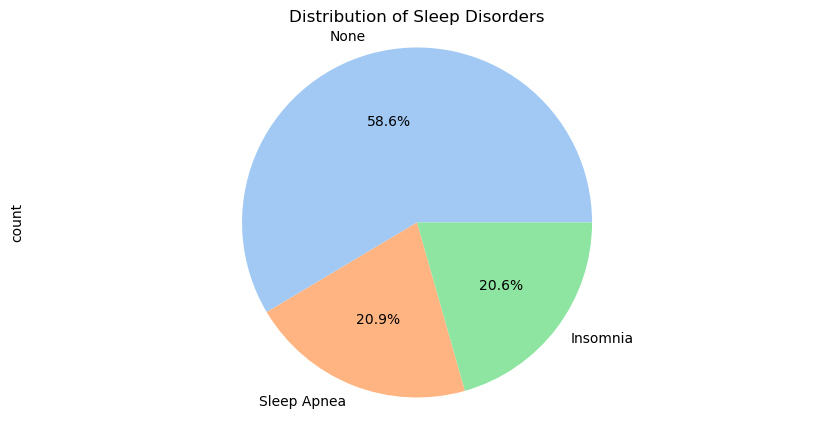

In [26]:
sns.set_palette("pastel")
df['sleep_disorder'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 5))
plt.title('Distribution of Sleep Disorders')
plt.axis('equal')
plt.show()

In [27]:
df['sleep_disorder'].value_counts()

sleep_disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

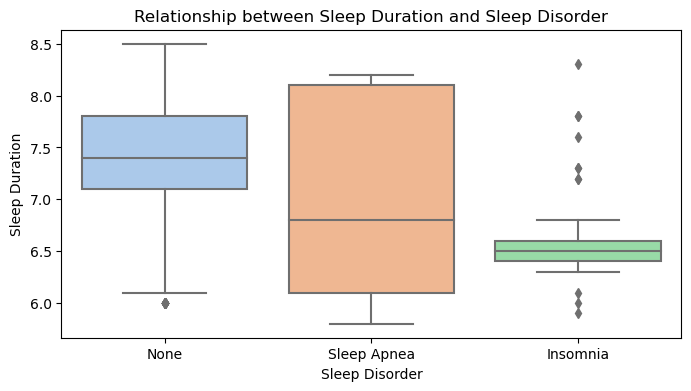

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='sleep_disorder', y='sleep_duration', data=df)
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.title('Relationship between Sleep Duration and Sleep Disorder')
plt.show()

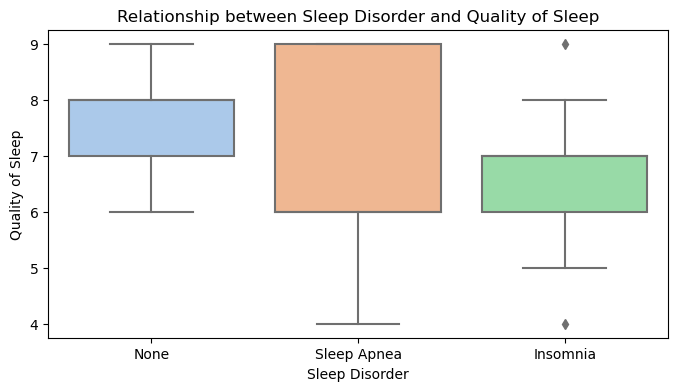

In [29]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='sleep_disorder', y='quality_of_sleep')
plt.title('Relationship between Sleep Disorder and Quality of Sleep')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')
plt.show()

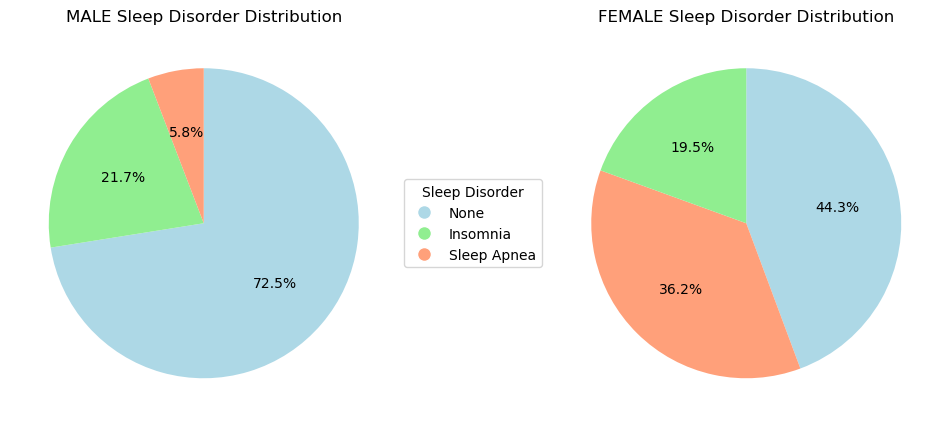

In [30]:
colors = {'None': 'lightblue', 'Insomnia': 'lightgreen', 'Sleep Apnea': 'lightsalmon'}
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.4})
male_disorder_counts = male_df['sleep_disorder'].value_counts()
axes[0].pie(male_disorder_counts, autopct='%1.1f%%', startangle=90, counterclock=False, labels=None, colors=[colors.get(disorder, 'gray') for disorder in male_disorder_counts.index])
axes[0].set_title('MALE Sleep Disorder Distribution')
female_disorder_counts = female_df['sleep_disorder'].value_counts()
axes[1].pie(female_disorder_counts, autopct='%1.1f%%', startangle=90, counterclock=False, labels=None, colors=[colors.get(disorder, 'gray') for disorder in female_disorder_counts.index])
axes[1].set_title('FEMALE Sleep Disorder Distribution')
legend_labels = male_disorder_counts.index
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[disorder], markersize=10) for disorder in legend_labels]
axes[0].legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title="Sleep Disorder")
plt.show()

<b>Interpretation:</b>
-  Among individuals without sleeping disorders in this dataset, men outnumber women.
-  Sleep apnea is more common among women than men.
-  Men slightly outnumber women in cases of insomnia.

In [31]:
df.groupby('occupation')['sleep_disorder'].value_counts().reset_index()

,occupation,sleep_disorder,count
0,Accountant,None,30
1,Accountant,Insomnia,7
2,Doctor,None,64
3,Doctor,Sleep Apnea,4
4,Doctor,Insomnia,3
5,Engineer,None,57
6,Engineer,Insomnia,5
7,Engineer,Sleep Apnea,1
8,Lawyer,None,42
9,Lawyer,Sleep Apnea,3


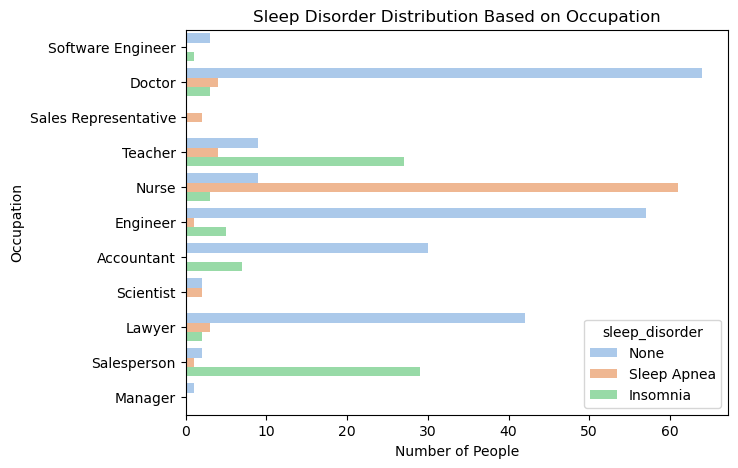

In [32]:
plt.figure(figsize=(7, 5))
sns.countplot(y='occupation', hue='sleep_disorder', data=df)
plt.xlabel('Number of People')
plt.ylabel('Occupation')
plt.title('Sleep Disorder Distribution Based on Occupation')
plt.show()

<Figure size 1000x600 with 0 Axes>

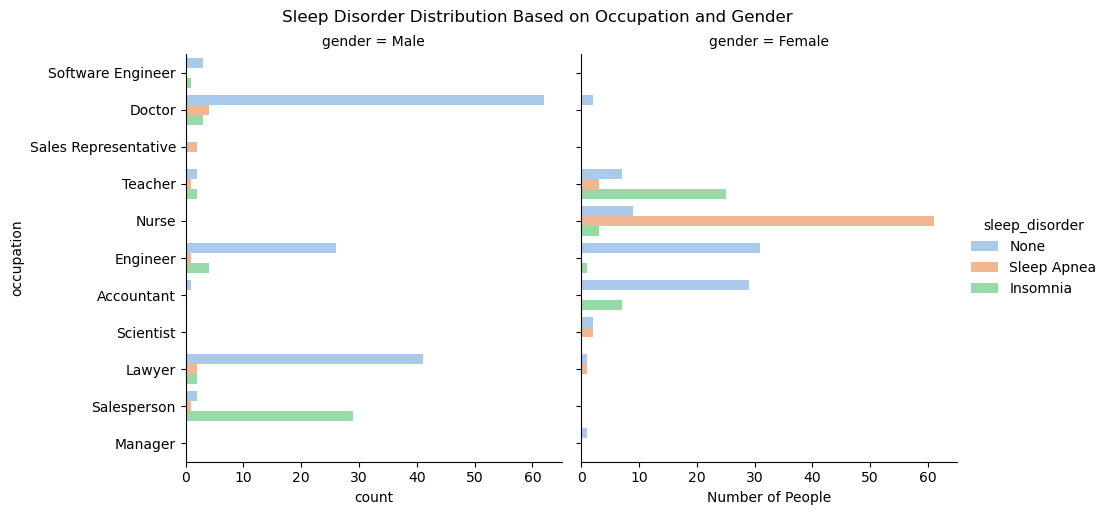

In [33]:
plt.figure(figsize=(10, 6))
sns.catplot(y='occupation', hue='sleep_disorder', col='gender', kind='count', data=df)
plt.xlabel('Number of People')
plt.ylabel('Occupation')
plt.suptitle('Sleep Disorder Distribution Based on Occupation and Gender', y=1.02)
plt.show()

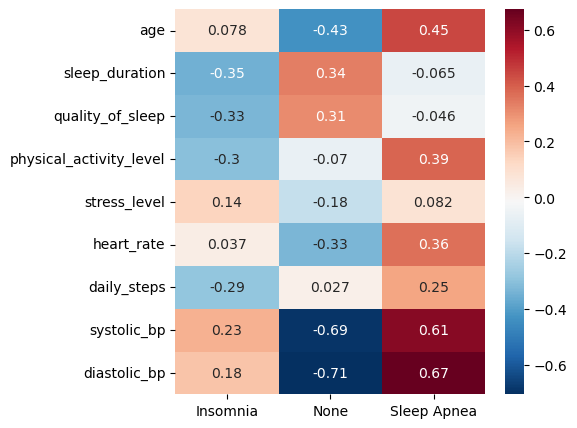

In [34]:
# Heatmap for sleep disorders and other variables 

sleep_dummies = pd.get_dummies(df["sleep_disorder"])
sleep_new = df.drop("sleep_disorder", axis = 1)
sleep_disorders = pd.concat([sleep_new, sleep_dummies], axis = 1)
corr_2 = sleep_disorders.corr(numeric_only = True)
plt.figure(figsize = (5,5))
sns.heatmap(corr_2.iloc[:-3, -3:], annot = True, cmap='RdBu_r');

<b>Interpretation:</b>

<b>Insomnia:</b>

- Negatively correlated with sleep duration (-0.35), quality of sleep (-0.33), and physical activity level (-0.30): indicates that individuals with insomnia may experience shorter sleep durations, lower sleep quality, and lower physical activity levels.
- Positively correlated with stress level (0.14) and blood pressure: weak positive association between insomnia and higher stress levels, as well as blood pressure.


<b>None (No Sleep Disorder):</b>

- Negatively correlated with blood pressure (-0.69 and -0.71): individuals without sleep disorders may have lower blood pressure.
- Negatively correlated with age (-0.43): younger individuals are less likely to have sleep disorders.
- Positively correlated with sleep duration (0.34) and quality of sleep (0.31): individuals without sleep disorders may have longer sleep durations and higher sleep quality.
- Negatively correlated with stress level (-0.18 - weak correlation) and heart rate (-0.33): individuals without sleep disorders may have slightly lower stress levels and lower heart rates.


<b>Sleep Apnea:</b>

- Positively correlated with blood pressure (0.61 and 0.67): individuals with sleep apnea in this dataset tends to have higher blood pressure.
- Positively correlated with age (0.45): individuals with sleep apnea tend to be slightly older.
- Positively correlated with physical activity level (0.39): individuals with sleep apnea may have higher physical activity levels.
- Weak positive correlation with stress level (0.082) and heart rate (0.36): weak association between sleep apnea and higher stress levels and heart rates.
<br><br>


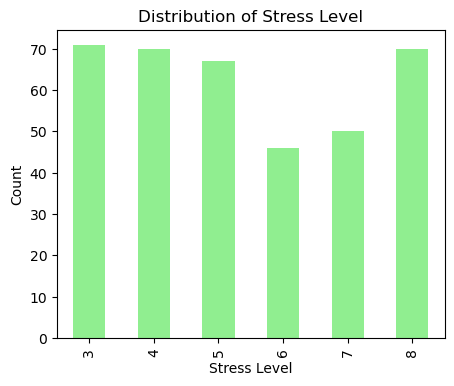

In [35]:
plt.figure(figsize=(5, 4))
df['stress_level'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Distribution of Stress Level')
plt.show()

In [36]:
df['stress_level'].value_counts()

stress_level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

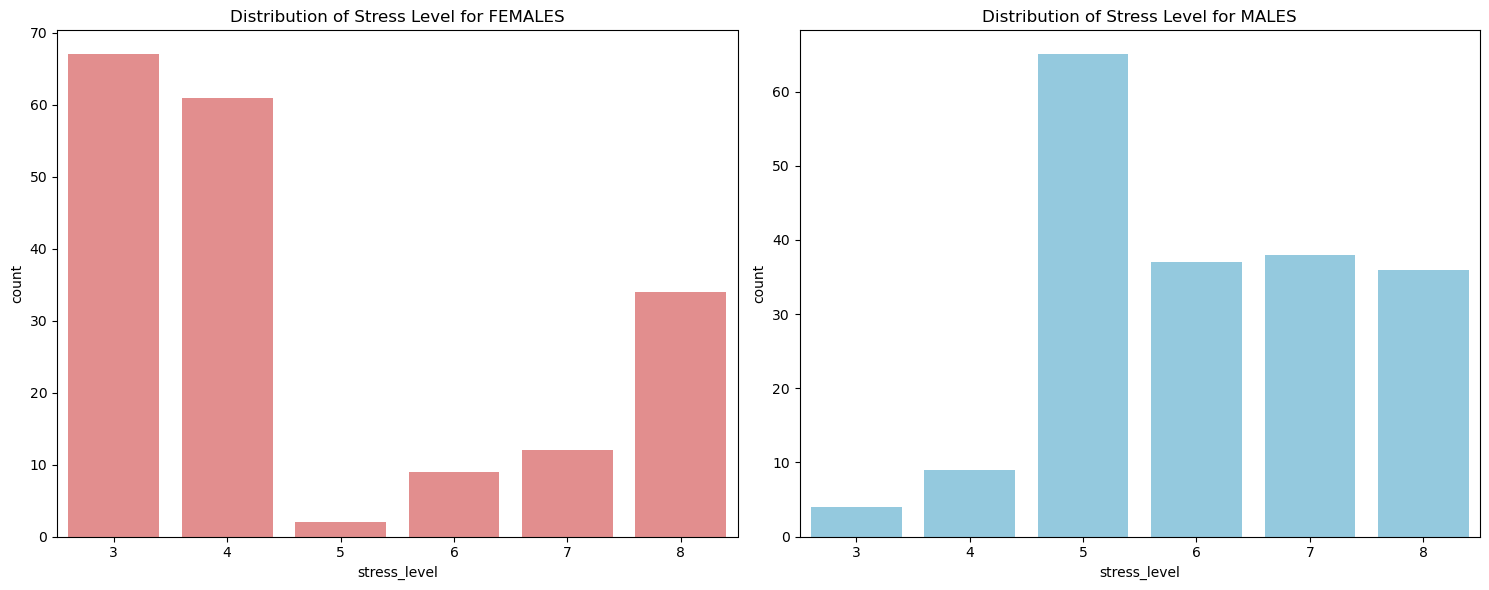

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='stress_level', data=df[df['gender'] == 'Female'], color='lightcoral', ax=ax1)
ax1.set_title('Distribution of Stress Level for FEMALES')
sns.countplot(x='stress_level', data=df[df['gender'] == 'Male'], color='skyblue', ax=ax2)
ax2.set_title('Distribution of Stress Level for MALES')
plt.tight_layout()
plt.show()

In [38]:
df.groupby('stress_level')[['sleep_disorder']].value_counts().reset_index()

,stress_level,sleep_disorder,count
0,3,None,40
1,3,Sleep Apnea,30
2,3,Insomnia,1
3,4,None,43
4,4,Insomnia,24
5,4,Sleep Apnea,3
6,5,None,57
7,5,Insomnia,6
8,5,Sleep Apnea,4
9,6,None,43


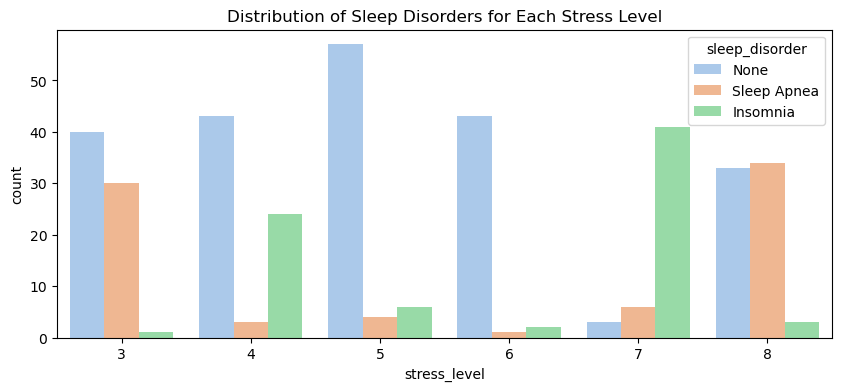

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x='stress_level', hue='sleep_disorder', data=df, palette='pastel', ax=ax)
plt.title('Distribution of Sleep Disorders for Each Stress Level')
plt.show()

<b>Comment:</b>
<br>It can be observed that individuals without sleep disorders among stress levels are the most numerous. We can see maybe small dependencies (for example that with higher stress levels, the frequency of insomnia increases), but they are not very obvious.

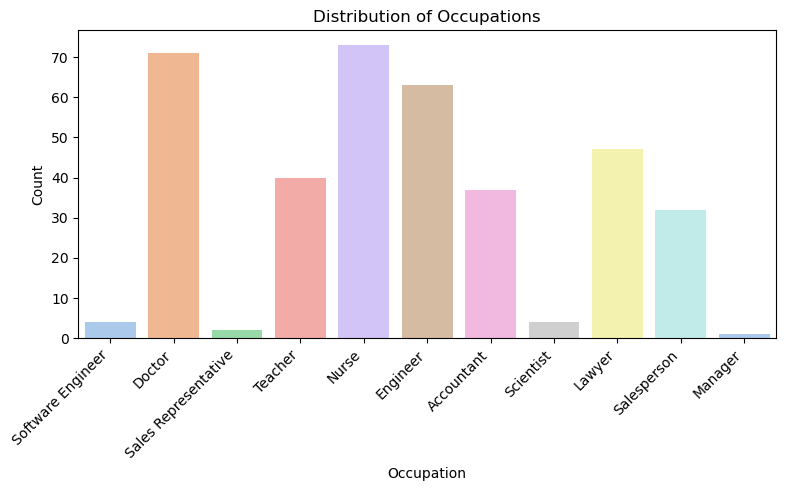

In [40]:
plt.figure(figsize=(9, 4))
sns.countplot(x='occupation', data=df, palette='pastel')
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

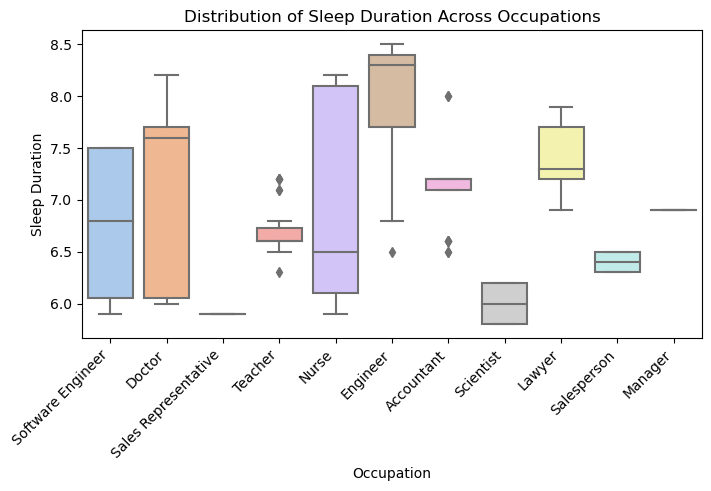

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='occupation', y='sleep_duration', data=df, palette='pastel')
plt.title('Distribution of Sleep Duration Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

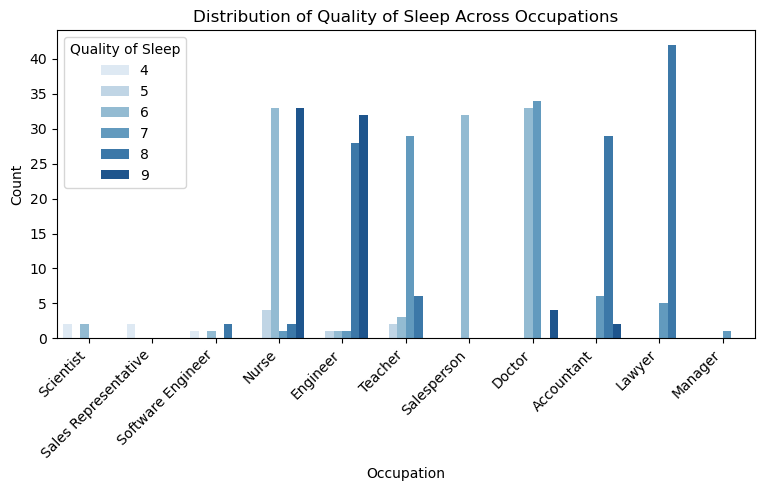

In [42]:
df_sorted = df.sort_values('quality_of_sleep', ascending=True)
color_palette = sns.color_palette("Blues")
plt.figure(figsize=(9, 4))
sns.countplot(x='occupation', hue='quality_of_sleep', data=df_sorted, palette=color_palette)
plt.title('Distribution of Quality of Sleep Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.legend(title='Quality of Sleep')
plt.xticks([i for i in range(len(df_sorted['occupation'].unique()))])
plt.show()

In [43]:
df.groupby('occupation')['quality_of_sleep'].mean().reset_index()

,occupation,quality_of_sleep
0,Accountant,7.891892
1,Doctor,6.647887
2,Engineer,8.412698
3,Lawyer,7.893617
4,Manager,7.000000
5,Nurse,7.369863
6,Sales Representative,4.000000
7,Salesperson,6.000000
8,Scientist,5.000000
9,Software Engineer,6.500000


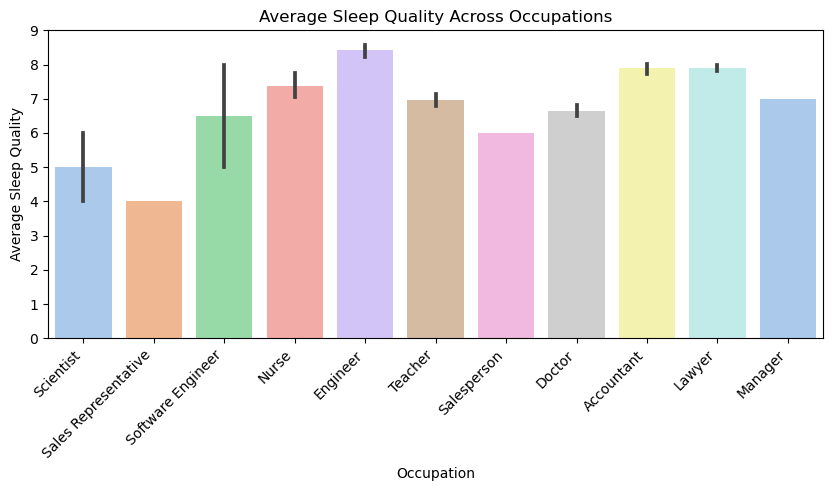

In [44]:
df_sorted = df.sort_values('quality_of_sleep', ascending=True)
color_palette = sns.color_palette("pastel")  
plt.figure(figsize=(10, 4))  
sns.barplot(x='occupation', y='quality_of_sleep', data=df_sorted, palette=color_palette)
plt.title('Average Sleep Quality Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

<b>Conclusions:</b>
- Engineers, accountants and lawyers seem to have the highest average sleep quality.
- Sales representatives have the lowest average sleep quality compared to other occupational groups.
- The average sleep quality among different occupational groups can vary, possibly due to different work-related factors and lifestyles.

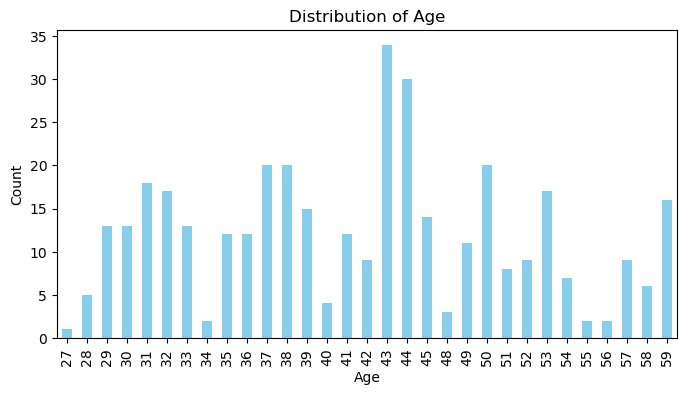

In [45]:
plt.figure(figsize=(8, 4))
df['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [46]:
sorted_age_counts = df['age'].value_counts().sort_index()
sorted_age_counts

age
27     1
28     5
29    13
30    13
31    18
32    17
33    13
34     2
35    12
36    12
37    20
38    20
39    15
40     4
41    12
42     9
43    34
44    30
45    14
48     3
49    11
50    20
51     8
52     9
53    17
54     7
55     2
56     2
57     9
58     6
59    16
Name: count, dtype: int64

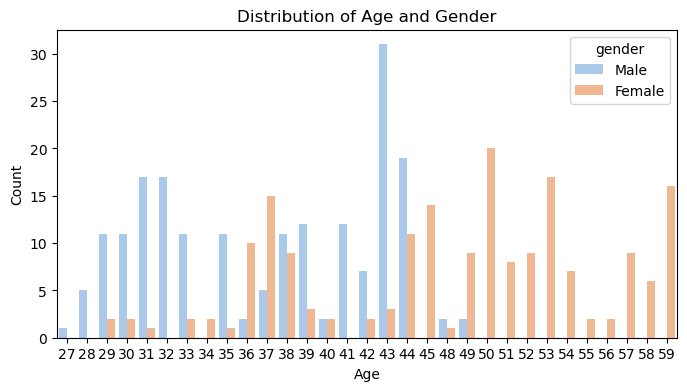

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(x='age', hue='gender', data=df, palette='pastel')
plt.title('Distribution of Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

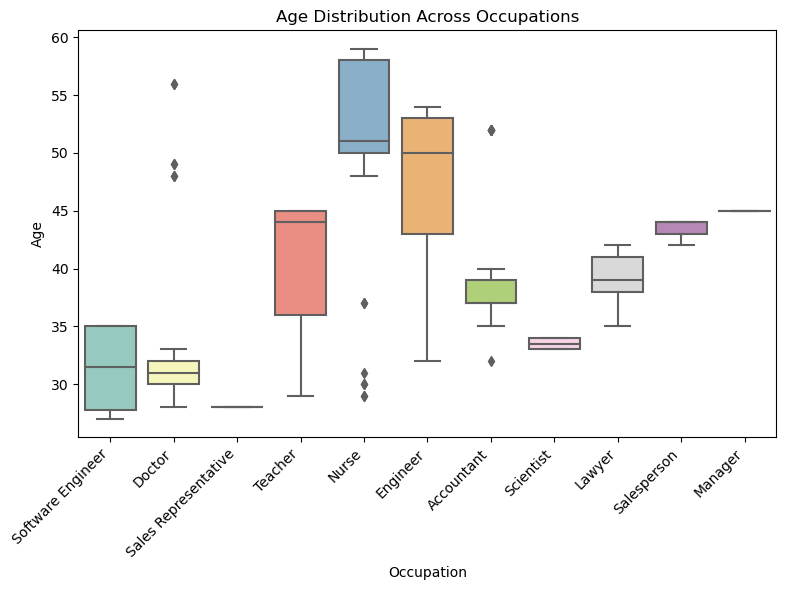

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='occupation', y='age', data=df, palette='Set3')
plt.title('Age Distribution Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

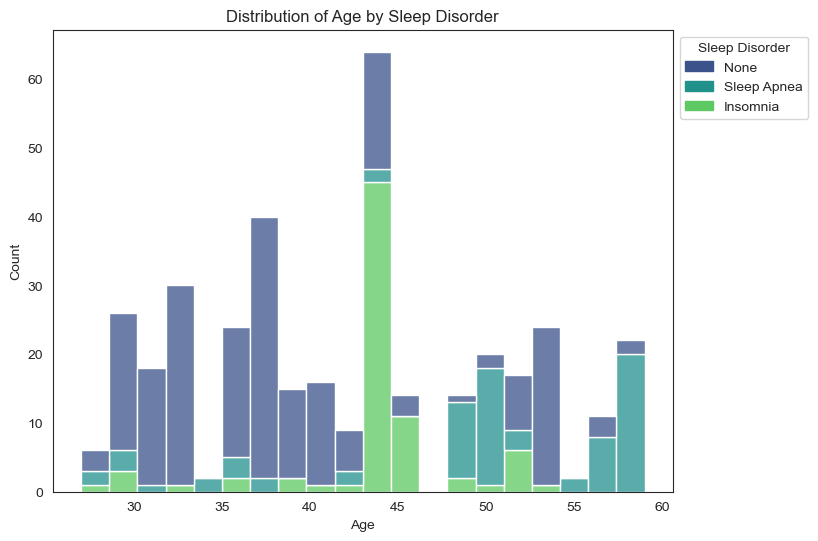

In [49]:
sns.set_style("white")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='sleep_disorder', multiple='stack', palette='viridis', bins=20)
plt.title('Distribution of Age by Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Count')
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette('viridis', len(df['sleep_disorder'].unique()))]
plt.legend(handles, df['sleep_disorder'].unique(), title='Sleep Disorder', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

<b>Comment:</b>
<br><br>Generally, for younger people, no sleep disorders predominates, and for older people, cases of Sleep Apnea are increasing. Insomnia is present to varying degrees in most age groups, but appears to be a predominant problem in middle age.

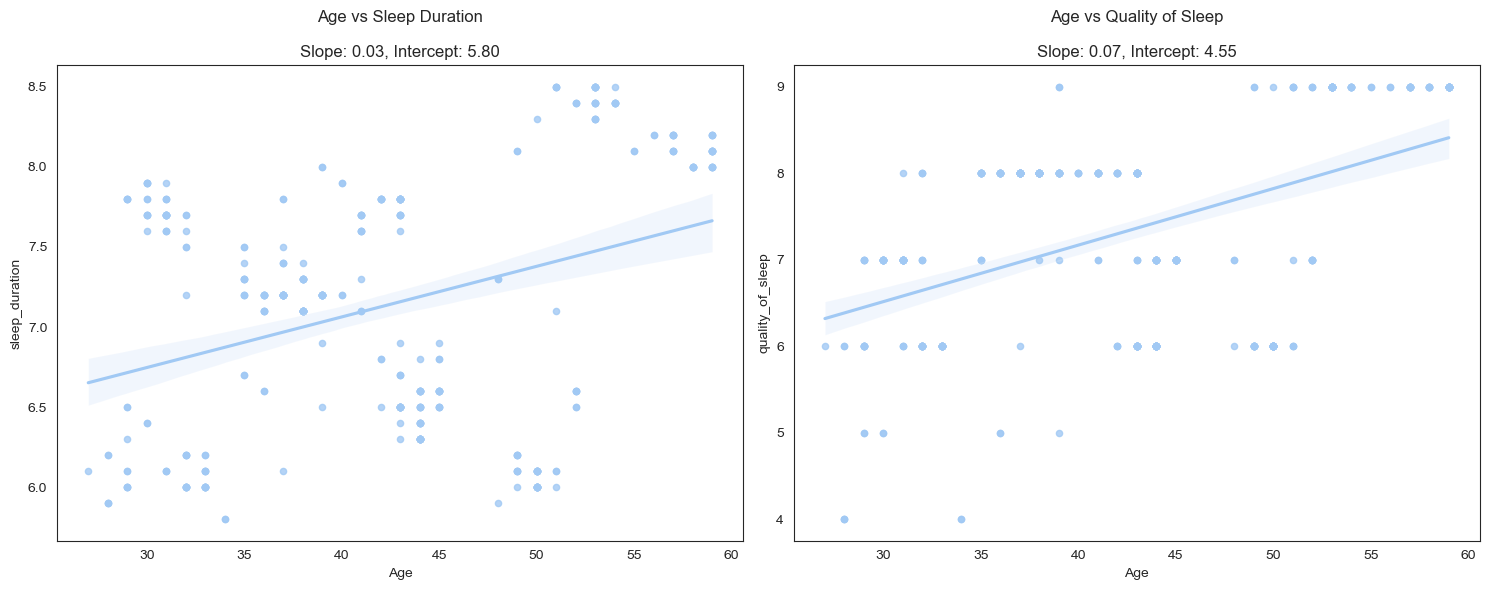

In [50]:
def plot_regression_line(x, y, ax, title):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 20})
    ax.set_title(f'{title}\nSlope: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}')
    ax.set_xlabel('Age')
    ax.set_ylabel(y.name)
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 2, 1)
plot_regression_line(df['age'], df['sleep_duration'], ax1, 'Age vs Sleep Duration\n')
ax2 = plt.subplot(1, 2, 2)
plot_regression_line(df['age'], df['quality_of_sleep'], ax2, 'Age vs Quality of Sleep\n')
plt.tight_layout()
plt.show()

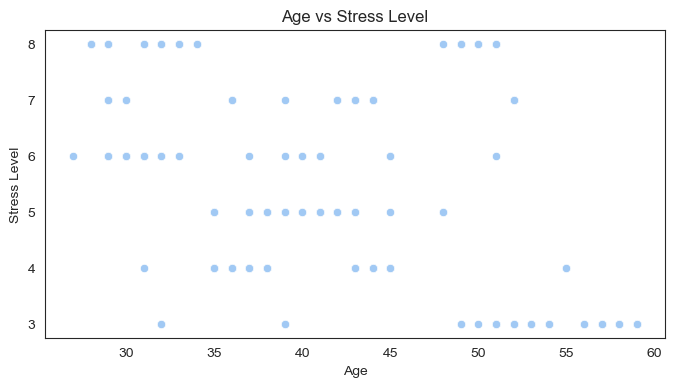

In [51]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='stress_level', data=df, palette='viridis')
plt.title('Age vs Stress Level')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

<b> Comment: </b>

Overall, there appears to be a small positive correlation between age and both sleep duration and quality of sleep, suggesting that as individuals age, they tend to experience longer and better-quality sleep. 

This is an interesting point to think about. It is generally expected that as people age, they may experience various sleep problems, such as insomnia and interrupted sleep. However, the results from this data set suggest some departures from this pattern.
A possible explanation may be, for example, lifestyle changes: older people may have a more stable life, which has a positive effect on the quality of sleep. Calmer living conditions, less stressful professional duties, and stable social relationships may promote better sleep.

The relationship with stress levels is more complex, showing less obvious patterns. 
But it appears that older people report lower levels of stress. This may result from the above-mentioned better coping mechanisms and experience, which helps to look at life situations from a greater perspective.
These findings provide valuable insights into the age-related dynamics of sleep and stress in this dataset.

# Processing Data

In [52]:
# split X, y
X = df.drop(['quality_of_sleep','sleep_duration'], axis=1)
y = df['quality_of_sleep']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [54]:
# preprocessing numerical data
numerical_transformer = SimpleImputer(strategy='mean')
X_train[numerical_features] = numerical_transformer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_transformer.transform(X_test[numerical_features])

# encoding categorical data 
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# ensuring columns match between training and test sets after dummy encoding
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

In [55]:
# reordering test set columns to match the order of training set columns
X_test = X_test[X_train.columns]

# standardizing numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Modeling - Validation

In [56]:
# Linear Regression Model

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)

# Metrics
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print(f'MSE: {linear_mse}')
print(f'MAE: {linear_mae}')
print(f'R2 Score: {linear_r2}')

MSE: 0.04931613441318282
MAE: 0.1151362540975312
R2 Score: 0.9673104812545188


In [57]:
# DecisionTreeRegressor Model

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

# Metrics
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print(f'MSE: {tree_mse}')
print(f'MAE: {tree_mae}')
print(f'R2 Score: {tree_r2}')

MSE: 0.02666666666666667
MAE: 0.02666666666666667
R2 Score: 0.9823238274805562


# Hypotesis testing

In [58]:
# Hypothesis:

# H0: No significant difference in mean sleeping hours across stress levels
# H1: There is a significant difference in mean sleeping hours across stress levels

In [59]:
grouped_data = [df['sleep_duration'][df['stress_level'] == level] for level in df['stress_level'].unique()]

# function f_oneway for ANOVA test
stat, p_val = stats.f_oneway(*grouped_data)

print(f"F-statistic: {stat}")
print(f"P-value: {p_val}")

# If the p-value is below a chosen significance level (0.05), the null hypothesis rejected 
# and there is a significant difference in the means 
# If the p-value is above 0.05, the null hypothesis cannot be rejected, suggesting no significant difference

F-statistic: 448.9980460885595
P-value: 3.4860871734641316e-154


In [60]:
# interpretation of results
if p_val < 0.05:
    print("H0 rejected - there is a significant difference in mean sleeping hours across stress levels.")
else:
    print("H0 not rejected - there is NO significant difference in mean sleeping hours across stress levels.")

H0 rejected - there is a significant difference in mean sleeping hours across stress levels.


# Saving Data

In [61]:
# saving DataFrame to .csv

df.to_csv('clean_shl_df.csv', index=False)

In [62]:
clean_shl_df = pd.read_csv('clean_sleep_df.csv') 

In [63]:
import pymysql
from sqlalchemy import create_engine
import getpass 

password = getpass.getpass("Please enter the SQL database password: ")
connection_string = 'mysql+pymysql://root:' + password + '@localhost/Ironhack_Mid_Project'
engine = create_engine(connection_string)

connection = engine.connect()

with connection.begin():
    clean_shl_df.to_sql(name='clean_sleep_health_lifestyle', con=connection, if_exists='append', index=False)

Please enter the SQL database password: ········


In [64]:
# Reading back from SQL

password = getpass.getpass()
query1 = 'SELECT * FROM clean_sleep_health_lifestyle'
shl_df_analysis = pd.read_sql_query(query1, engine)
shl_df_analysis

········


,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency,sleep_quality
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,2
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,4
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,4
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,0
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,0.0,3.0,Yes,0.0,4
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,1


# Summary

This analysis uncovers relationships between lifestyle factors and sleep patterns. Contrary to expectations, age demonstrates a positive correlation with both sleep duration and quality. This challenges the assumption that aging inevitably leads to sleep disturbances, suggesting that perhaps lifestyle changes, stability, and improved coping mechanisms in older age contribute to enhanced sleep.
<br><br>Stress emerges as a pivotal factor, showcasing strong negative associations with sleep duration and quality. Higher stress levels correlate with shorter sleep durations and lower sleep quality. The intricate dynamics between stress, heart rate, and blood pressure further underscore the intricate interplay of physiological and psychological factors in influencing sleep patterns.
<br><br>Insights into sleep disorders reveal complex connections, with insomnia negatively impacting sleep duration, quality, and physical activity. Sleep apnea, linked to age and physical activity, shows subtle correlations with stress and heart rate.
<br><br>Occupational groups exhibit divergent sleep quality averages, highlighting potential work-related influences. Engineers, accountants, and lawyers report higher sleep quality, while sales representatives show lower averages.
<br><br>In essence, this analysis underscores the complexity of factors influencing sleep. It challenges preconceptions about age-related sleep disturbances and emphasizes the critical role of stress in shaping sleep outcomes. The interconnections observed prompt further exploration into the intricate web of lifestyle, stress, and age dynamics, providing valuable insights for future research and interventions aimed at enhancing sleep quality.
